<a href="https://colab.research.google.com/github/hyunicecream/Inflearn/blob/main/%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연습문제

### **라이브러리 설치 (대부분 설치되어있다는 가정 하)**

- !pip3 install requests
- !pip3 install beautifulsoup4
- 크롤링 URL : [http://www.paullab.co.kr/stock.html](http://www.paullab.co.kr/stock.html)

### 문제 1번

각 회사별 1만주씩 있다고 가정했을 때, 전그룹사 시가총액을 구해주세요.

- 그룹사 : [ 제주코딩베이스캠프 연구원,  제주코딩베이스캠프 공업, 제주코딩베이스캠프 출판사, 제주코딩베이스캠프 학원]

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://paullab.synology.me/stock.html')

response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup.select('.main')[2] # 제주코딩베이스캠프 연구원
soup.select('.main')[3] # 제주코딩베이스캠프 공업
soup.select('.main')[4] # 제주코딩베이스캠프 출판사
soup.select('.main')[5] # 제주코딩베이스캠프 학원

<div class="main">
<h2 id="제주코딩베이스캠프학원">제주코딩베이스캠프 학원</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date ">2019.10.23</span></td>
<td class="num "><span>2,600</span></td>
<td class="num ">
<img height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            600
                        </span>
</td>
<td class="num "><span>2,055</span></td>
<td class="num "><span>2,600</span></td>
<td class="num "><span>2,020</span></td>
<td class="num "><span>2,203,110</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>2,000</span></td>
<td class="num">
<img alt="상승" height="6" src="ico_up.gif" style="margin-right:4px;" width="7"/><span>
        

In [ ]:
그룹사별일일시가 = soup.select('.main')[2:6]
오늘종가 = []
오늘시가총액 = []

for i in 그룹사별일일시가:
    print(i.select('.table > tbody > tr')[1].select('td')[1].text.replace(',', ''))

6650
31300
13250
2600


In [ ]:
그룹사별일일시가 = soup.select('.main')[2:6]
오늘종가 = []
오늘시가총액 = []

for i in 그룹사별일일시가:
    오늘종가.append(int(i.select('.table > tbody > tr')[1].select('td')[1]
										.text.replace(',', '')))
print(오늘종가)

[6650, 31300, 13250, 2600]


In [ ]:
# 문제 1 정답
오늘시가총액 = [i*10000 for i in 오늘종가]
전그룹사시가총액 = format(sum(오늘시가총액), ',')
전그룹사시가총액

'538,000,000'

### 문제 2번

전그룹사 시가총액 추이를 그래프로 그려주세요. x축은 날짜, y축은 가격입니다.

In [ ]:
그룹사별일일시가 = soup.select('.main')[2:6]
오늘종가 = []
오늘시가총액 = []
for j in range(1, len(soup.select('.main')[2].select('table > tbody > tr'))):
    오늘종가 = []
    for i in 그룹사별일일시가:
        오늘종가.append(int(i.select('.table > tbody > tr')[j].select('td')[1].
												text.replace(',', '')))
    오늘시가총액.append(sum(오늘종가))
오늘시가총액

[53800,
 53180,
 53615,
 52305,
 49035,
 48755,
 46970,
 46140,
 45900,
 45765,
 44000,
 43210,
 43830,
 44310,
 44850,
 44370,
 43935,
 44180,
 44410,
 46245]

In [ ]:
# 날짜 table 크롤링 
날짜전체 = soup.select('.main')[2].select('.table > tbody > tr > td > .date')
date = []
for i in 날짜전체:
  date.append(i.text)
date

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

In [ ]:
그룹사별일일시가 = soup.select('.main')[2:6]
오늘종가 = []
오늘시가총액 = []
for j in range(1, len(soup.select('.main')[2].select('table > tbody > tr'))):
    오늘종가 = []
    for i in 그룹사별일일시가:
        오늘종가.append(int(i.select('.table > tbody > tr')[j].select('td')[1].
												text.replace(',', '')))
    오늘시가총액.append(sum(오늘종가))
오늘시가총액 = [i*10000 for i in 오늘시가총액]
오늘시가총액

[538000000,
 531800000,
 536150000,
 523050000,
 490350000,
 487550000,
 469700000,
 461400000,
 459000000,
 457650000,
 440000000,
 432100000,
 438300000,
 443100000,
 448500000,
 443700000,
 439350000,
 441800000,
 444100000,
 462450000]

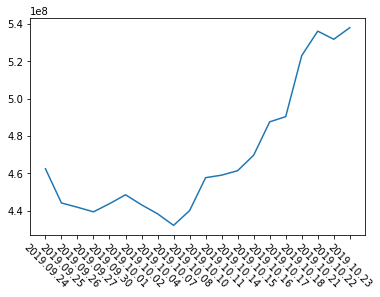

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# [::-1] 역순으로 출력해준다. 
plt.plot(date[::-1], 오늘시가총액[::-1])
plt.xticks(rotation = -45)
plt.show()